<a href="https://colab.research.google.com/github/Shegy12/GAN-for-generating-artificial-ECG-data/blob/master/Keras_models_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Keras GAN bootstrap**

Simple guideline for building a simple Keras GAN model.



In [0]:
# install Keras first
!pip install keras

## **1 Sequential model**

* Sequential model is a linear stack of layers



In [0]:
#1 create model
from keras.models import Sequential
model = Sequential()

## **2 Layers and activation functions model**

https://keras.io/layers/about-keras-layers/

https://keras.io/activations/

###**Define the input shape**

* The model needs to **know what input shape it should expect.** For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.

*Option 1:*

* Pass an **input_shape** argument to the first layer. This is a shape **tuple** (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In **input_shape,** the batch dimension is not included.

*Option 2:*

* Some **2D** layers, such as Dense, support the specification of their input shape 
via the argument **input_dim,** and some 3D temporal layers support the arguments **input_dim and input_length.**

*Option 3:*

* If you ever **need to specify a fixed batch size** for your inputs (this is **useful for stateful recurrent networks**), you can pass a **batch_size** argument to a layer. If you pass both **batch_size=32** and **input_shape=(6, 8)** to a layer, it will then expect every batch of inputs to have the batch shape (32, 6, 8).

In [0]:
#2 create layers inside of model and activation functions
from keras.layers import Dense, Activation

#exaples of SAME input shape
model.add(Dense(32, input_shape=(784,)))
# this is the same
model.add(Dense(32, input_dim=784))

#separated syntax
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

#together syntax
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

##**3 Compilation of model**

###**Loss function, Optimizer, Metrics**

#### Before training a model, you need to configure the learning process, which is done via the compile method.
#### It receives three arguments:

*Loss function :*

https://keras.io/losses/

* This is the objective that the **model will try to minimize.** It can be the **string identifier** of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses in next cell.

*Optimizer :*


https://keras.io/optimizers/

* This could be the **string identifier** of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. See: optimizers in next cell.

*Metrics :*

https://keras.io/metrics/

* For any **classification problem** you will want to set this to metrics=['accuracy']. A metric could be the **string identifier** of an existing metric or a custom metric function. See: metrics in next cell.

In [0]:
# Losses
from keras import losses


#mean_squared_error
keras.losses.mean_squared_error(y_true, y_pred)
#...https://keras.io/losses/


# Optimizers
from keras import optimizers


#The parameters clipnorm and clipvalue can be used with all optimizers to control gradient clipping:

# Option 1: All parameter gradients will be clipped to a maximum norm of 1.
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

# Option 2: All parameter gradients will be clipped toa maximum value of 0.5 and a minimum value of -0.5.
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)

#Stochastic gradient descent optimizer. (float, float, True/False)
keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
#Adam optimizer.(float, float, float, True/False)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#...https://keras.io/optimizers/


# Metrics
from keras import metrics

#accuracy
keras.metrics.accuracy(y_true, y_pred)
#binary_accuracy
keras.metrics.binary_accuracy(y_true, y_pred, threshold=0.5)

#...https://keras.io/metrics/


#3 compile the model

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# For custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

##**4 Training of model**

### Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function. Read its documentation here.

https://keras.io/models/sequential/

In [36]:
#4 training the model

# For a single-input model with 2 classes (binary classification):
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np

data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))


# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

# or train on batch manually
model.train_on_batch(data, labels)


########################################################################
# For a single-input model with 10 classes (categorical classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

# or train on batch manually
model.train_on_batch(data, labels)

np.shape(labels)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

##**5 Evaluate the model and predict**

In [0]:
#5 evaluate performance 
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

#6 predict
classes = model.predict(x_test, batch_size=128)

#**Examples**



##**Sequence classification with LSTM:**

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 256)         262144    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 459,393
Trainable params: 459,393
Non-trainable params: 0
_________________________________________________________________


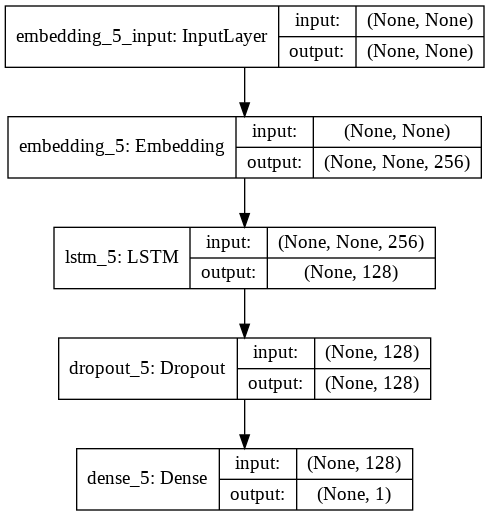

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

max_features = 1024

# define the standalone discriminator model
def define_discriminator(max_features = 1024):
    model = Sequential()
    model.add(Embedding(max_features, output_dim=256))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])
    return model

discriminator_model=define_discriminator()
discriminator_model.summary()
plot_model(discriminator_model, to_file='discriminator_plot.png',show_shapes=True, show_layer_names=True)


model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)